In [16]:
import os
import cv2
import json
import matplotlib.pyplot as plt

In [17]:
train = "../dataset/processed/two_classes/train.txt"
val = "../dataset/processed/two_classes/train.txt"

In [3]:
with open(train, 'r') as f:
    train_list = f.readlines()

(338, 450, 3)
0 0.8851666666666667 0.4291715976331361 0.013177777777777778 0.029230769230769234

1 0.2687111111111111 0.4712278106508876 0.3420888888888889 0.19801775147928996
(338, 450, 3)


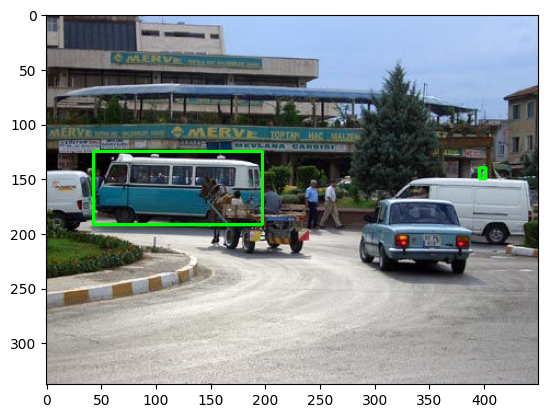

In [25]:
min_rel_area = []
max_rel_area = []
for fn in train_list[:1]:
    fn = fn.replace("\n", "")
    fn = f"../{fn}"

    label_fn = fn.replace('.jpg', '.txt').replace("raw/images", "processed/two_classes/labels")
    img = cv2.imread(fn.strip())
    print(img.shape)
    with open(label_fn, 'r') as f:
        fname = label_fn.split("/")[-1].replace(".txt", "")
        
        label = f.readlines()
        for l in label:
            print(l)
            _, xc, yc, bh, bw = [float(x) for x in l.strip().split(" ")]
            xc, yc, bw, bh  = xc * img.shape[1], yc * img.shape[0], bh * img.shape[1], bw * img.shape[0]
            x2, y2 = xc + bw/2, yc + bh/2
            x1, y1 = xc - bw/2, yc - bh/2
            
            img = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('uint8')
    print(img.shape)
    plt.imshow(img)
            


In [ ]:
min_rel_area = []
max_rel_area = []
for fn in train_list[:1]:
    fn = fn.replace("\n", "")
    fn = f"../{fn}"

    label_fn = fn.replace('.jpg', '.txt').replace("raw/images", "processed/two_classes/labels")
    img = cv2.imread(fn.strip())
    print(img.shape)
    with open(label_fn, 'r') as f:
        fname = label_fn.split("/")[-1].replace(".txt", "")
        
        label = f.readlines()
        for i, l in enumerate(label):
            _, xc, yc, bh, bw = [float(x) for x in l.strip().split(" ")]
            xc, yc, bw, bh  = xc * img.shape[1], yc * img.shape[0], bh * img.shape[1], bw * img.shape[0]

            if i == 0:
                min_rel_area.append(bh * bw)
            else:
                max_rel_area.append(bh * bw)
                        
